In [1]:
import extract_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from scipy.signal import filtfilt, butter, iirnotch, welch
import math
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data_train, words_train, starts_train, ends_train = extract_data.extract_data(r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\SilentSpeechDAS\fEMGData\mouthed_full_6_set1.txt", r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\silent-speech\scripts\Mouthed_Full_6_set1.txt")
data_test, words_test, starts_test, ends_test = extract_data.extract_data(r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\SilentSpeechDAS\fEMGData\mouthed_full_6_set2.txt", r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\silent-speech\scripts\Mouthed_Full_6_set2.txt")


2022-04-01T15:59:48.241-05
2022-04-01T16:17:14.794-05


In [4]:
chan_1_test = data_test[:,0]
chan_2_test = data_test[:,1]
chan_3_test = data_test[:,2]
chan_4_test = data_test[:,3]
chan_5_test = data_test[:,4]
chan_6_test = data_test[:,5]
channel_data_test = [chan_1_test, chan_2_test, chan_3_test, chan_4_test, chan_5_test, chan_6_test]

In [5]:
chan_1_train = data_train[:,0]
chan_2_train = data_train[:,1]
chan_3_train = data_train[:,2]
chan_4_train = data_train[:,3]
chan_5_train = data_train[:,4]
chan_6_train = data_train[:,5]
channel_data_train = [chan_1_train, chan_2_train, chan_3_train, chan_4_train, chan_5_train, chan_6_train]

### Creating target variable list

In [6]:
len(chan_1_train)

791100

In [7]:
len(chan_1_test)

762300

In [8]:
y_train = np.zeros(791100)
y_test = np.zeros(762300)

In [9]:
for i in range(len(starts_train)):
    y_train[starts_train[i]:ends_train[i]+1] = 1

In [10]:
for i in range(len(starts_test)):
    y_test[starts_test[i]:ends_test[i]+1] = 1

In [11]:
print(np.count_nonzero(y_train))
print(np.count_nonzero(y_test))

186972
177553


In [12]:
print(len(y_train))
print(len(y_test))

791100
762300


### Filtering

In [13]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_train = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_train):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_train[idx] = abs(signal_filtered)

In [14]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_test = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_test):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_test[idx] = abs(signal_filtered)

### RMS

In [15]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_train:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

In [16]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_test:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

### Deleting extraneous data

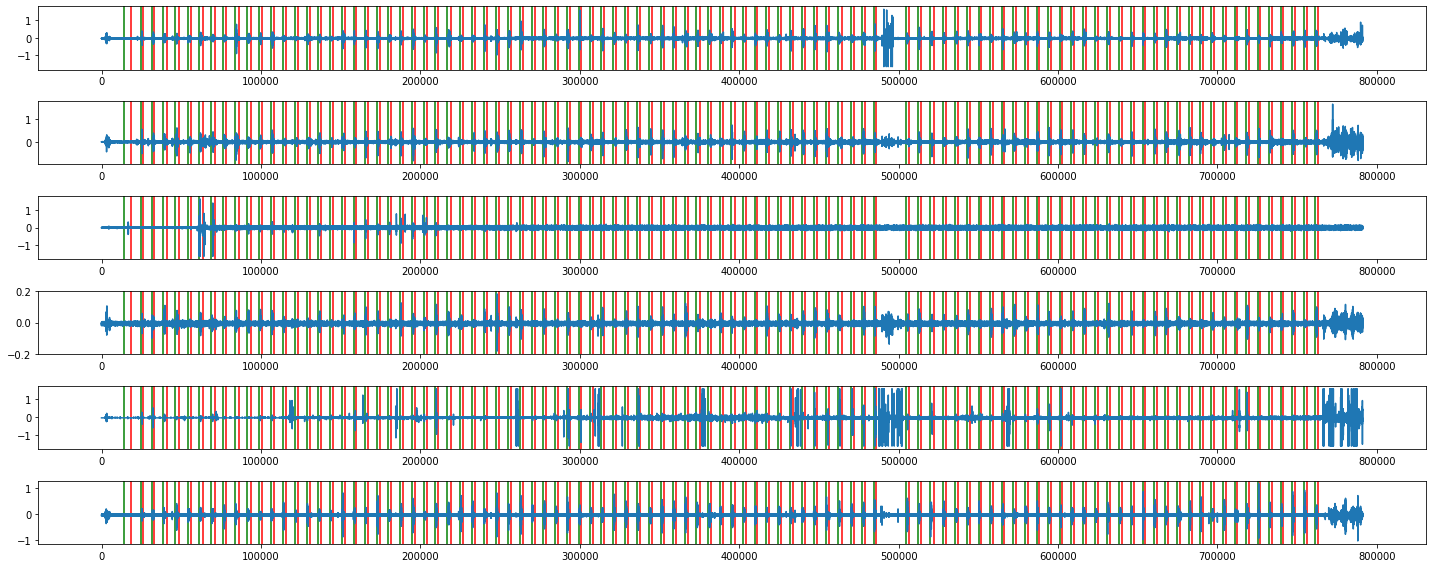

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_train[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_train,-2,2,'g'); plt.vlines(ends_train,-2,2,'r')

plt.tight_layout()
plt.show()

In [18]:
print(starts_train)
print(ends_train)

[ 14240  24887  31761  38686  46417  54040  61477  68990  76463  83780
  91498  99039 106413 113859 121238 128705 136102 143415 150648 158155
 165164 172573 179984 187250 194805 202244 209424 216849 224700 232185
 239798 247298 254899 262487 269827 277232 284705 291915 299280 306527
 313639 320923 328295 335768 343649 351095 358514 365907 373220 380673
 387850 395164 402673 409726 416773 424091 431950 439283 446744 454322
 462088 469891 477345 484734 504933 512307 519784 527799 535179 542947
 550315 557358 564680 572021 579299 586619 594013 601316 608244 615951
 623438 630795 638540 645829 653125 660241 667403 674734 682327 689439
 696329 703541 710891 718117 725495 732530 739867 747043 754209 761580]
[ 18715  26189  33163  40988  48535  56071  63531  71028  78320  85995
  93533 100891 108349 115623 123206 130562 137923 145050 152606 159653
 167044 174457 181720 189273 196774 203896 211320 219178 226659 234218
 241756 249350 256903 264271 271682 279130 286401 293678 301047 308063
 3153

In [20]:
#deleting indices :24887,486094-504933, 763442:

for i in range(len(filtered_data_train)):
    arr1 = filtered_data_train[i][24887:486094]
    arr2 = filtered_data_train[i][504933:763442]
    filtered_data_train[i] = np.concatenate([arr1, arr2])
    

In [21]:
len(filtered_data_train[0])

719716

In [22]:
arr1 = y_train[24887:486094]
arr2 = y_train[504933:763442]
y_train = np.concatenate([arr1, arr2])
len(y_train)

719716

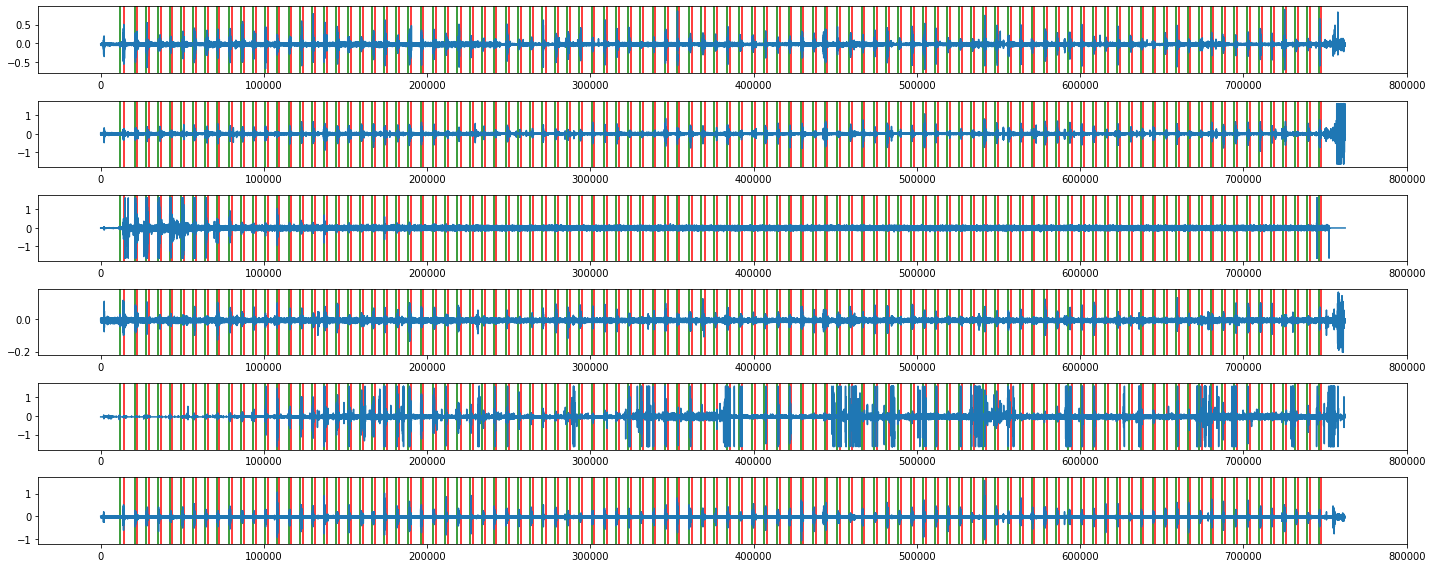

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_test[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_test,-2,2,'g'); plt.vlines(ends_test,-2,2,'r')

plt.tight_layout()
plt.show()

In [23]:
print(starts_test)
print(ends_test)

[ 11908  20750  27816  35146  42344  49319  56837  64052  71160  78378
  85957  93411 100502 107804 115050 122169 129482 136574 144177 151724
 159062 166301 173541 181144 188460 195943 203261 211102 218517 226243
 233562 240804 247976 255725 263063 270508 278193 285735 293242 300658
 308101 315502 322978 330455 338111 345375 352873 360132 367965 375837
 383412 391086 398774 406455 414102 421650 428882 436102 443575 450924
 458364 466127 473516 480943 488571 496122 503707 511168 518650 525977
 533244 540508 548064 555504 563002 570379 577593 585135 592575 600331
 607775 615300 622530 629831 637210 644371 651466 658885 666277 672974
 679979 686989 694493 701883 709518 716928 724415 731756 739024 746205]
[ 14484  22193  29603  36900  43836  51314  58557  65611  72736  80368
  87869  94965 102244 109523 116654 123917 131059 138631 146202 153511
 160725 167954 175506 182835 190311 197678 205483 212905 220685 227987
 235223 242428 250137 257443 264888 272517 280074 287563 294975 302400
 3098

In [24]:
#deleting indices :20750, 747706:

for i in range(len(filtered_data_test)):
    filtered_data_test[i] = filtered_data_test[i][20750:747706]

In [25]:
len(filtered_data_test[0])

726956

In [26]:
y_test = y_test[20750:747706]

### Downsampling y

In [27]:
#large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_train_new = np.zeros(int(len(y_train)/20)+1)
i = 0
while ind1 < len(y_train):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_train):
        ind2 = len(y_train)
                
    num_label = np.count_nonzero(y_train[ind1:ind2])
    if num_label > 19:
        y_train_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [28]:
#large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_test_new = np.zeros(int(len(y_test)/20)+1)
i = 0
while ind1 < len(y_test):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_test):
        ind2 = len(y_test)
                
    num_label = np.count_nonzero(y_test[ind1:ind2])
    if num_label > 19:
        y_test_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [29]:
print(len(y_train))
print(len(y_train_new))
print(len(y_test))
print(len(y_test_new))

719716
35986
726956
36348


### Smoothing data as described by SAD doc

In [30]:
def smooth(raw):
        
    #large window to average over
    window = 40
        
    #overlap interval
    skip = 20
        
    ind1 = 0
    ind2 = window
    copy = np.copy(np.array(raw))
    new = np.zeros(int(len(raw)/20)+1)
    i = 0
    while ind1 < len(raw):
            
        #remaining data less than window size, avoid array out of bounds
        if ind2 > len(raw):
            ind2 = len(raw)
                
        val = np.mean(copy[ind1:ind2], dtype=np.float64)
        new[i] = val
            
            
        ind1 = ind1 + skip
        ind2 = ind2 + skip
        i = i+1
    return new
    
def calculate(smoothed_envelope):
        
    return np.abs(np.diff(smoothed_envelope))

In [31]:
ready_data_train = [0,0,0,0,0,0]

for i in range(len(filtered_data_train)):
    res = smooth(filtered_data_train[i])
    ready_data_train[i] = calculate(res)

In [32]:
ready_data_test = [0,0,0,0,0,0]

for i in range(len(filtered_data_test)):
    res = smooth(filtered_data_test[i])
    ready_data_test[i] = calculate(res)

In [33]:
print(np.count_nonzero(ready_data_train[0]))
print(np.count_nonzero(ready_data_test[0]))

35985
36347


In [34]:
print(len(ready_data_train[0]))
print(len(ready_data_test[0]))

35985
36347


In [35]:
y_train_new = y_train_new[:35985]
print(len(y_train_new))
y_test_new = y_test_new[:36347]
print(len(y_test_new))

35985
36347


### Making dataframe and prepping for decision tree classifier

In [36]:
df_train = pd.DataFrame({
    
    "Chan1": ready_data_train[0],
    "Chan2": ready_data_train[1],
    "Chan3": ready_data_train[2],
    "Chan4": ready_data_train[3],
    "Chan5": ready_data_train[4],
    "Chan6": ready_data_train[5],
    "Y": y_train_new 
})

In [37]:
df_test = pd.DataFrame({
    
    "Chan1": ready_data_test[0],
    "Chan2": ready_data_test[1],
    "Chan3": ready_data_test[2],
    "Chan4": ready_data_test[3],
    "Chan5": ready_data_test[4],
    "Chan6": ready_data_test[5],
    "Y": y_test_new 
})

In [38]:
X_train = df_train[['Chan1', 'Chan2', 'Chan3', 'Chan4', 'Chan5', 'Chan6']]
y_train = df_train[['Y']]
X_test = df_test[['Chan1', 'Chan2', 'Chan3', 'Chan4', 'Chan5', 'Chan6']]
y_test = df_test[['Y']]

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
print(clf.score(X_test, y_test))

0.7848240570060803


In [42]:
print(np.mean(cross_val_score(clf, X_train, y_train)))

0.7635681533972489


In [43]:
predicted = clf.predict(X_test)

#I obtain the accuracy of this fold
ac=accuracy_score(predicted,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(y_test, predicted)
print(cm)



0.7848240570060803
[[23773  3828]
 [ 3993  4753]]
